In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Problem Statement
    A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. 
    BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19
    


## 2.Data Understanding
        Understanding the data by exploring it and understanding its characterisitics.

In [2]:
bike_df = pd.read_csv("day.csv")

In [3]:
bike_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Check null values
round(100*(bike_df.isnull().sum()/len(bike_df.index)),2).sort_values(ascending=True)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Observation: No missing values found , thus no data imputation is required

In [6]:
bike_df.shape

(730, 16)

In [7]:
bike_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [8]:
# Exploring the data.. 
# List the number of unique values in the format column, unique values if the values are less.
for col in bike_df.columns:
    print(col,bike_df[col].nunique())
    if bike_df[col].nunique()<10:
        print(bike_df[col].value_counts())

instant 730
dteday 730
season 4
3    188
2    184
1    180
4    178
Name: season, dtype: int64
yr 2
0    365
1    365
Name: yr, dtype: int64
mnth 12
holiday 2
0    709
1     21
Name: holiday, dtype: int64
weekday 7
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
workingday 2
1    499
0    231
Name: workingday, dtype: int64
weathersit 3
1    463
2    246
3     21
Name: weathersit, dtype: int64
temp 498
atemp 689
hum 594
windspeed 649
casual 605
registered 678
cnt 695


Conclusion: instant is an identifier column, can be removed.

## 3. Data cleaning and manipulation

In [9]:
bike_df.drop('instant',axis=1,inplace=True)

In [10]:
#convert date with object type to date.
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'],dayfirst=True)

<Figure size 1440x720 with 0 Axes>

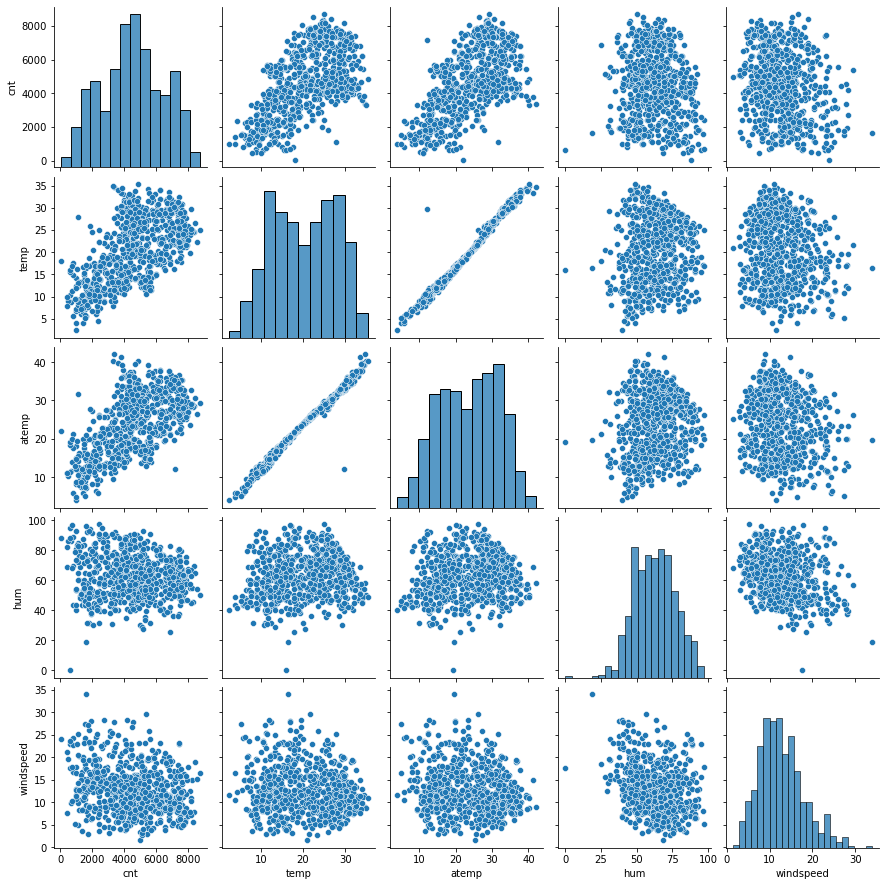

In [11]:
plt.figure(figsize = (20,10))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])

Conclusion: Temp and atemp is highly correlated. Count is linearly correlated with atemp and temp. Hence linear regression can be used.

<AxesSubplot:>

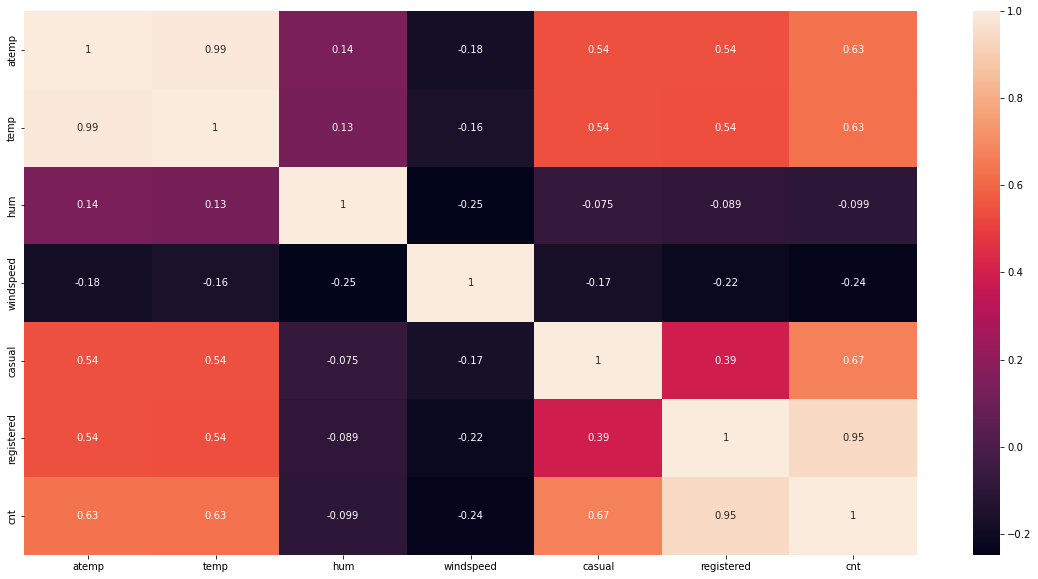

In [12]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(bike_df[['atemp','temp','hum','windspeed','casual','registered','cnt']].corr(),annot=True)

#### Observation: temp and atemp are highly correlated, One of the variables can be dropped.
#### Observation: Keeping the casual and registered might cause data leakage, so removing one of the variables

In [13]:
bike_df.drop(['temp','casual','registered'],inplace=True,axis=1)

<AxesSubplot:>

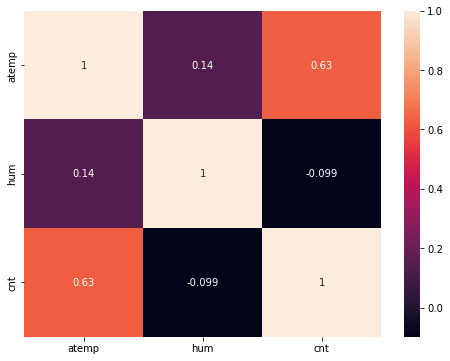

In [14]:
plt.figure(figsize = (8,6))        # Size of the figure
sns.heatmap(bike_df[['atemp','hum','cnt']].corr(),annot=True)

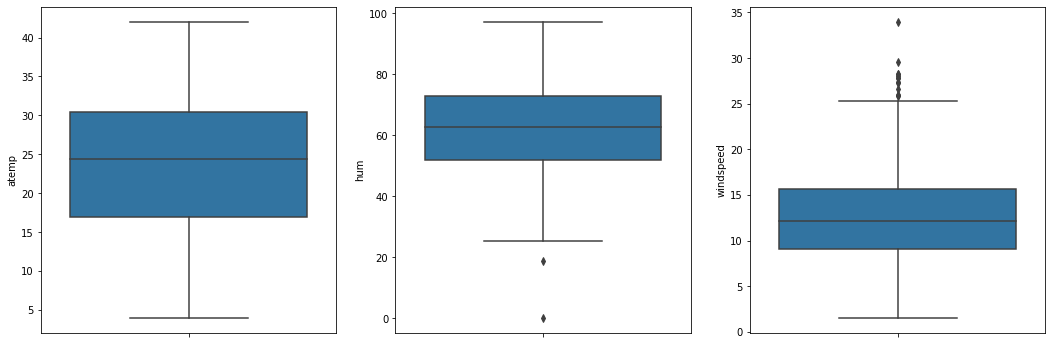

In [15]:
#Check outliers
o_cols = ['atemp','hum','windspeed']
plt.figure(figsize=(18,6))
i =1
for col in o_cols:
    plt.subplot(1,3,i)
    sns.boxplot(y=col,data=bike_df)
    i= i +1

##### Conclusion: No outliers to be handled. So we can proceed further with existing data.

## 4. Data Quality
    Checking the quality of data by checking the outliers in the continuous variables. 
    Mapping the categorical variables with numerical data to string data for better readability


In [16]:
# Replace categorical values with string value.
bike_v2 = bike_df.copy()
bike_v2['season']=bike_df['season'].map({1:'SPRING',2:'SUMMER',3:'FALL',4:'WINTER'})
bike_v2.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0 2018-01-01  SPRING   0     1        0        6           0           2   
1 2018-01-02  SPRING   0     1        0        0           0           2   
2 2018-01-03  SPRING   0     1        0        1           1           1   
3 2018-01-04  SPRING   0     1        0        2           1           1   
4 2018-01-05  SPRING   0     1        0        3           1           1   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [17]:
bike_v2['season'].value_counts()

FALL      188
SUMMER    184
SPRING    180
WINTER    178
Name: season, dtype: int64

In [18]:
# Replace categorical values with string value.
bike_v2['weathersit']=bike_df['weathersit'].map({1:'CLEAR',2:'MIST',3:'LIGHT_RAIN',4:'HEAVY_RAIN'})

In [19]:
bike_v2['weathersit'].value_counts()

CLEAR         463
MIST          246
LIGHT_RAIN     21
Name: weathersit, dtype: int64

In [20]:
bike_v2['mnth']=bike_df['mnth'].map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',
                                     8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'})
bike_v2['mnth'].value_counts()

JAN    62
MAR    62
MAY    62
JUL    62
AUG    62
OCT    62
DEC    62
APR    60
JUN    60
SEP    60
NOV    60
FEB    56
Name: mnth, dtype: int64

In [21]:
bike_v2['weekday']=bike_df['weekday'].map({0:'SUN',1:'MON',2:'TUE',3:'WED',4:'THU',5:'FRI',6:'SAT',7:'SUN'})
bike_v2['weekday'].value_counts()

SAT    105
SUN    105
MON    105
TUE    104
THU    104
FRI    104
WED    103
Name: weekday, dtype: int64

In [22]:
bike_v2['yr']=bike_v2['yr'].map({0:'YEAR_2018',1:'YEAR_2019'})
bike_v2.head()

dteday  season         yr mnth  holiday weekday  workingday weathersit  \
0 2018-01-01  SPRING  YEAR_2018  JAN        0     SAT           0       MIST   
1 2018-01-02  SPRING  YEAR_2018  JAN        0     SUN           0       MIST   
2 2018-01-03  SPRING  YEAR_2018  JAN        0     MON           1      CLEAR   
3 2018-01-04  SPRING  YEAR_2018  JAN        0     TUE           1      CLEAR   
4 2018-01-05  SPRING  YEAR_2018  JAN        0     WED           1      CLEAR   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

## 5. Exploratory data analysis
    To understand if there is any patterns and creating derived variables to understand the data better.

<AxesSubplot:xlabel='weekday'>

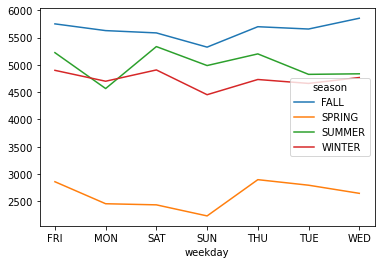

In [23]:
by_year_month = pd.pivot_table(bike_v2, values='cnt', index=['weekday'], columns=['season'], aggfunc=np.mean)
by_year_month.plot()

##### Observation: During the spring the count of value is very low. compared to other seasons.

### Computing derived variables

In [24]:
# Deriving "days since the dataset started"
from datetime import date


d0 = date(2017, 12, 31)
d1 = date(2018 ,12, 31)
d2 = bike_df.dteday

#print(bike_df.dteday[0].year)
delta = d2.apply(lambda x:x.date()-d0 if x.date().year==2018 else x.date()-d1)
bike_v2['day']= delta
bike_v2['date'] = bike_df['dteday'].apply(lambda x:x.day)


In [25]:
# Cleaning days
bike_v2['day'] = bike_v2['day'].astype(str)
bike_v2['day'] = bike_v2['day'].map(lambda x: x[:-4])
bike_v2['day'] = bike_v2['day'].astype(int)

In [26]:
by_year_month = pd.pivot_table(bike_v2, values='cnt', index=['day'], columns=['yr'], aggfunc=np.mean)
by_year_month.plot(title = "Month/Season vs Average Count")

<AxesSubplot:title={'center':'Month/Season vs Average Count'}, xlabel='day'>

##### Observation: This shows year by year there is a trend or some form of seasonality associated with year.

In [27]:
# Drop columns date
bike_v2.drop(['dteday'],axis = 1,inplace=True)

In [28]:
bike_v2.head()

season         yr mnth  holiday weekday  workingday weathersit     atemp  \
0  SPRING  YEAR_2018  JAN        0     SAT           0       MIST  18.18125   
1  SPRING  YEAR_2018  JAN        0     SUN           0       MIST  17.68695   
2  SPRING  YEAR_2018  JAN        0     MON           1      CLEAR   9.47025   
3  SPRING  YEAR_2018  JAN        0     TUE           1      CLEAR  10.60610   
4  SPRING  YEAR_2018  JAN        0     WED           1      CLEAR  11.46350   

       hum  windspeed   cnt  day  date  
0  80.5833  10.749882   985    1     1  
1  69.6087  16.652113   801    2     2  
2  43.7273  16.636703  1349    3     3  
3  59.0435  10.739832  1562    4     4  
4  43.6957  12.522300  1600    5     5

In [29]:
season = pd.get_dummies(bike_v2['season'],drop_first=True)
year = pd.get_dummies(bike_v2['yr'],drop_first=True)
month = pd.get_dummies(bike_v2['mnth'],drop_first=True)
weekday = pd.get_dummies(bike_v2['weekday'],drop_first=True)
weathersit = pd.get_dummies(bike_v2['weathersit'],drop_first=True)

In [30]:
bike_v2 = pd.concat([bike_v2,season,month,year,weathersit,weekday],axis=1)
bike_v2.drop(['season','mnth','yr','weathersit','weekday','date'],axis = 1,inplace=True)

## 6. Split the data for training and testing.
    The data should be splitted into two dataframes for training and testing. Train part of the data is used to fit the model. Test part of the data should be used to predict the model and validate the assumptions

In [31]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bike_v2, train_size = 0.7, test_size = 0.3, random_state = 100)

## 7. Scale the model for training.
    If there is varying scale across the variables it would be difficult to interpret the coffecients at the end.So the model should have scaled data where the variable values lies in the same range. This can be done using minmaxscaler.

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bike_v2.head()
bike_v2.columns

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt', 'day',
       'SPRING', 'SUMMER', 'WINTER', 'AUG', 'DEC', 'FEB', 'JAN', 'JUL', 'JUN',
       'MAR', 'MAY', 'NOV', 'OCT', 'SEP', 'YEAR_2019', 'LIGHT_RAIN', 'MIST',
       'MON', 'SAT', 'SUN', 'THU', 'TUE', 'WED'],
      dtype='object')

In [33]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed','cnt']
df_train.loc[:,num_vars] = scaler.fit_transform(df_train.loc[:,num_vars])
df_train.head()


C:\Users\idhay\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


holiday  workingday     atemp       hum  windspeed       cnt  day  \
653        0           1  0.501133  0.575354   0.300794  0.864243  289   
576        0           1  0.766351  0.725633   0.264686  0.827658  212   
426        0           0  0.438975  0.640189   0.255342  0.465255   62   
728        0           0  0.200348  0.498067   0.663106  0.204096  364   
482        0           0  0.391735  0.504508   0.188475  0.482973  118   

     SPRING  SUMMER  WINTER  ...  SEP  YEAR_2019  LIGHT_RAIN  MIST  MON  SAT  \
653       0       0       1  ...    0          1           0     0    0    0   
576       0       0       0  ...    0          1           0     0    0    0   
426       1       0       0  ...    0          1           0     1    0    1   
728       1       0       0  ...    0          1           0     0    0    0   
482       0       1       0  ...    0          1           0     1    0    1   

     SUN  THU  TUE  WED  
653    0    0    1    0  
576    0    0    1    0  
426    0    0    0    0  
728    1    0    0    0  
482    0    0    0    0  

[5 rows x 30 columns]

In [34]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

C:\Users\idhay\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


holiday  workingday     atemp       hum  windspeed       cnt  day  \
184        1           0  0.769660  0.657364   0.084219  0.692706  185   
535        0           1  0.842587  0.610133   0.153728  0.712034  171   
299        0           1  0.496145  0.837699   0.334206  0.303382  300   
221        0           1  0.795343  0.437098   0.339570  0.547400  222   
152        0           1  0.741471  0.314298   0.537414  0.569029  153   

     SPRING  SUMMER  WINTER  ...  SEP  YEAR_2019  LIGHT_RAIN  MIST  MON  SAT  \
184       0       0       0  ...    0          0           0     1    1    0   
535       0       1       0  ...    0          1           0     0    0    0   
299       0       0       1  ...    0          0           0     1    0    0   
221       0       0       0  ...    0          0           0     0    0    0   
152       0       1       0  ...    0          0           0     0    0    0   

     SUN  THU  TUE  WED  
184    0    0    0    0  
535    0    0    0    1  
299    0    1    0    0  
221    0    0    0    1  
152    0    1    0    0  

[5 rows x 30 columns]

In [35]:
# Set the output for train dataset
y_train = df_train.pop('cnt')
X_train = df_train

In [36]:
#Set the output for test dataset
y_test = df_test.pop('cnt')
X_test = df_test

## 8. Recursive feature elimination
    Since we have close to 60+ columns, it wouldn't make sense to try out all the columns which might result in multicolinearity.To avoid such cases let us go through RFE to select the features which is of significance and then test it out iteratively in our linear model

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 15),
 ('SPRING', True, 1),
 ('SUMMER', False, 6),
 ('WINTER', True, 1),
 ('AUG', False, 7),
 ('DEC', False, 3),
 ('FEB', False, 4),
 ('JAN', True, 1),
 ('JUL', True, 1),
 ('JUN', False, 9),
 ('MAR', False, 14),
 ('MAY', False, 5),
 ('NOV', False, 2),
 ('OCT', False, 11),
 ('SEP', True, 1),
 ('YEAR_2019', True, 1),
 ('LIGHT_RAIN', True, 1),
 ('MIST', True, 1),
 ('MON', False, 8),
 ('SAT', True, 1),
 ('SUN', True, 1),
 ('THU', False, 12),
 ('TUE', False, 10),
 ('WED', False, 13)]

In [41]:
print("Columns supported by RFE:",X_train.columns[rfe.support_])

Columns supported by RFE: Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'SPRING',
       'WINTER', 'JAN', 'JUL', 'SEP', 'YEAR_2019', 'LIGHT_RAIN', 'MIST', 'SAT',
       'SUN'],
      dtype='object')


In [42]:
print("Columns NOT supported by RFE:",X_train.columns[~rfe.support_])

Columns NOT supported by RFE: Index(['day', 'SUMMER', 'AUG', 'DEC', 'FEB', 'JUN', 'MAR', 'MAY', 'NOV', 'OCT',
       'MON', 'THU', 'TUE', 'WED'],
      dtype='object')


## 9. Model selection
    Run the models with varying set of parameters to understand its impact and use VIF to understand the inflation factor and remove the variables with high inflation factor.

In [43]:
import statsmodels.api as sm  
X_train_rfe= sm.add_constant(X_train)
X_train_rfe.head()

C:\Users\idhay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const  holiday  workingday     atemp       hum  windspeed  day  SPRING  \
653    1.0        0           1  0.501133  0.575354   0.300794  289       0   
576    1.0        0           1  0.766351  0.725633   0.264686  212       0   
426    1.0        0           0  0.438975  0.640189   0.255342   62       1   
728    1.0        0           0  0.200348  0.498067   0.663106  364       1   
482    1.0        0           0  0.391735  0.504508   0.188475  118       0   

     SUMMER  WINTER  ...  SEP  YEAR_2019  LIGHT_RAIN  MIST  MON  SAT  SUN  \
653       0       1  ...    0          1           0     0    0    0    0   
576       0       0  ...    0          1           0     0    0    0    0   
426       0       0  ...    0          1           0     1    0    1    0   
728       0       0  ...    0          1           0     0    0    0    1   
482       1       0  ...    0          1           0     1    0    1    0   

     THU  TUE  WED  
653    0    1    0  
576    0    1    0  
426    0    0    0  
728    0    0    0  
482    0    0    0  

[5 rows x 30 columns]

#### Model 1:
    Parameters Addition : atemp and holiday, 
    Reasoning : As atemp is linearly correlated with count and holiday is supported by RFE

In [44]:
lm1 = sm.OLS(y_train,X_train_rfe[['const','holiday', 'atemp']]).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     183.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           8.70e-61
Time:                        21:25:31   Log-Likelihood:                 177.62
No. Observations:                 510   AIC:                            -349.2
Df Residuals:                     507   BIC:                            -336.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1667      0.020      8.331      0.000       0.127       0.206
holiday       -0.0720      0.048     -1.491      0.137      -0.167       0.023
atemp          0.6799      0.036     18.968      0.000       0.609       0.750
==============================================================================
Omnibus:                        3.265   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                2.781
Skew:                           0.085   Prob(JB):                        0.249
Kurtosis:                       2.680   Cond. No.                         7.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 2
    Parameters Addition : hum,windspeed
    Parameters Removal : holiday
    Reasoning : workingday is the next attribute used for evalution. Holiday is removed as it has low significance as indicated by the high p value.

In [45]:
lm2 = sm.OLS(y_train,X_train_rfe[['const','hum','windspeed','atemp']]).fit()   
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     152.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           2.90e-70
Time:                        21:25:31   Log-Likelihood:                 202.43
No. Observations:                 510   AIC:                            -396.9
Df Residuals:                     506   BIC:                            -379.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4520      0.044     10.357      0.000       0.366       0.538
hum           -0.3316      0.052     -6.394      0.000      -0.434      -0.230
windspeed     -0.2278      0.045     -5.066      0.000      -0.316      -0.139
atemp          0.6830      0.035     19.428      0.000       0.614       0.752
==============================================================================
Omnibus:                        1.351   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                1.435
Skew:                           0.097   Prob(JB):                        0.488
Kurtosis:                       2.827   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 3
    Parameters Addition : YEAR_2019
    Parameters Removal : None
    Reasoning : Lets start from biggest periodicity and reduce it further. 

In [46]:
lm3 = sm.OLS(y_train,X_train_rfe[['const','hum','windspeed','atemp','YEAR_2019']]).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     351.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.38e-144
Time:                        21:25:31   Log-Likelihood:                 377.77
No. Observations:                 510   AIC:                            -745.5
Df Residuals:                     505   BIC:                            -724.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3125      0.032      9.890      0.000       0.250       0.375
hum           -0.2471      0.037     -6.677      0.000      -0.320      -0.174
windspeed     -0.2256      0.032     -7.067      0.000      -0.288      -0.163
atemp          0.6166      0.025     24.537      0.000       0.567       0.666
YEAR_2019      0.2320      0.010     22.348      0.000       0.212       0.252
==============================================================================
Omnibus:                       25.229   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.565
Skew:                          -0.421   Prob(JB):                     3.12e-08
Kurtosis:                       3.959   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 4
    Parameters Addition : SPRING,WINTER
    Parameters Removal : None
    Reasoning : seasons is the next attribute used for evalution. 

In [47]:
lm4 = sm.OLS(y_train,X_train_rfe[['const','atemp', 'hum', 'windspeed','YEAR_2019','SPRING','WINTER']]).fit()   # Adding seasons
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     317.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.33e-167
Time:                        21:25:31   Log-Likelihood:                 437.58
No. Observations:                 510   AIC:                            -861.2
Df Residuals:                     503   BIC:                            -831.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4159      0.034     12.317      0.000       0.350       0.482
atemp          0.5066      0.034     15.104      0.000       0.441       0.572
hum           -0.3059      0.034     -9.109      0.000      -0.372      -0.240
windspeed     -0.2051      0.029     -7.175      0.000      -0.261      -0.149
YEAR_2019      0.2328      0.009     25.137      0.000       0.215       0.251
SPRING        -0.1144      0.017     -6.858      0.000      -0.147      -0.082
WINTER         0.0489      0.014      3.576      0.000       0.022       0.076
==============================================================================
Omnibus:                       90.317   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.776
Skew:                          -0.861   Prob(JB):                     5.78e-55
Kurtosis:                       5.965   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Observation: R square reached a significant level, lets do VIF to eliminate variables with high inflation factor.

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_features(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    
print(get_vif_features(X_train[X_train.columns[rfe.support_]]))

      Features    VIF
1   workingday  41.67
13         SAT  10.16
14         SUN   9.84
2        atemp   3.11
5       SPRING   2.66
0      holiday   2.57
3          hum   1.91
6       WINTER   1.75
12        MIST   1.57
7          JAN   1.56
8          JUL   1.30
11  LIGHT_RAIN   1.25
4    windspeed   1.20
9          SEP   1.11
10   YEAR_2019   1.03


In [49]:
#After removing saturday and sunday..
print(get_vif_features(X_train[['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'SPRING',
       'WINTER', 'JAN', 'JUL', 'SEP', 'YEAR_2019', 'LIGHT_RAIN', 'MIST']]))

      Features    VIF
3          hum  24.23
2        atemp  16.27
4    windspeed   3.98
1   workingday   3.17
5       SPRING   2.87
12        MIST   2.24
10   YEAR_2019   2.07
6       WINTER   2.05
7          JAN   1.67
8          JUL   1.40
11  LIGHT_RAIN   1.22
9          SEP   1.20
0      holiday   1.10


In [50]:
#AFter removing humidity and windspeed
print(get_vif_features(X_train[['holiday', 'workingday', 'atemp', 'SPRING',
       'WINTER', 'JAN', 'JUL', 'SEP', 'YEAR_2019', 'LIGHT_RAIN', 'MIST']]))

      Features   VIF
2        atemp  4.39
1   workingday  3.08
8    YEAR_2019  2.05
3       SPRING  1.91
5          JAN  1.60
10        MIST  1.53
4       WINTER  1.37
6          JUL  1.34
7          SEP  1.19
0      holiday  1.09
9   LIGHT_RAIN  1.07


#### Model 5
    Parameters Addition : None
    Parameters Removal : hum
    Reasoning : hum has high VIF, hence removed. atemp is not removed as its coefficient is significant, hence kept for further analysis.

In [51]:
lm5 = sm.OLS(y_train,X_train_rfe[['const','atemp','YEAR_2019','SPRING','WINTER']]).fit()   # Running the linear model
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     368.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.19e-148
Time:                        21:25:31   Log-Likelihood:                 386.51
No. Observations:                 510   AIC:                            -763.0
Df Residuals:                     505   BIC:                            -741.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1511      0.025      6.056      0.000       0.102       0.200
atemp          0.5029      0.036     13.930      0.000       0.432       0.574
YEAR_2019      0.2405      0.010     23.675      0.000       0.221       0.260
SPRING        -0.1122      0.018     -6.100      0.000      -0.148      -0.076
WINTER         0.0390      0.015      2.641      0.009       0.010       0.068
==============================================================================
Omnibus:                      117.278   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.908
Skew:                          -1.069   Prob(JB):                     5.77e-80
Kurtosis:                       6.550   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 6
    Parameters Addition : workingday
    Parameters Removal : None
    Reasoning :All the variables have low significance and improves the overall model performance.So keeping everything.


In [52]:
lm6 = sm.OLS(y_train,X_train_rfe[['const','atemp', 'hum', 'YEAR_2019','SPRING','WINTER','workingday']]).fit()   # Running the linear model
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     283.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.09e-157
Time:                        21:25:31   Log-Likelihood:                 414.96
No. Observations:                 510   AIC:                            -815.9
Df Residuals:                     503   BIC:                            -786.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2815      0.031      9.034      0.000       0.220       0.343
atemp          0.5428      0.035     15.664      0.000       0.475       0.611
hum           -0.2566      0.034     -7.480      0.000      -0.324      -0.189
YEAR_2019      0.2322      0.010     23.973      0.000       0.213       0.251
SPRING        -0.1103      0.017     -6.327      0.000      -0.145      -0.076
WINTER         0.0597      0.014      4.189      0.000       0.032       0.088
workingday     0.0216      0.010      2.101      0.036       0.001       0.042
==============================================================================
Omnibus:                       99.698   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.111
Skew:                          -0.896   Prob(JB):                     1.87e-70
Kurtosis:                       6.450   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 7
    Parameters Addition : 'holiday'
    Parameters Removal : None
    Reasoning : Adding holiday as next level after working day.

In [53]:
lm7 = sm.OLS(y_train,X_train_rfe[['const','atemp','YEAR_2019','SPRING','WINTER', 'workingday', 'holiday']]).fit()   # Running the linear model
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     248.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          7.46e-147
Time:                        21:25:31   Log-Likelihood:                 389.59
No. Observations:                 510   AIC:                            -765.2
Df Residuals:                     503   BIC:                            -735.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1425      0.026      5.490      0.000       0.092       0.194
atemp          0.5015      0.036     13.945      0.000       0.431       0.572
YEAR_2019      0.2400      0.010     23.711      0.000       0.220       0.260
SPRING        -0.1101      0.018     -6.004      0.000      -0.146      -0.074
WINTER         0.0415      0.015      2.814      0.005       0.013       0.070
workingday     0.0146      0.011      1.314      0.189      -0.007       0.036
holiday       -0.0572      0.033     -1.739      0.083      -0.122       0.007
==============================================================================
Omnibus:                      116.966   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.040
Skew:                          -1.048   Prob(JB):                     6.67e-84
Kurtosis:                       6.692   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 8
    Parameters Addition : 'LIGHT_RAIN'
    Parameters Removal : holiday
    Reasoning :Holiday reduces the performance of the model.

In [54]:
lm8 = sm.OLS(y_train,X_train_rfe[['const','atemp','YEAR_2019','SPRING','WINTER', 'workingday','LIGHT_RAIN']]).fit()   # Running the linear model
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     303.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.05e-163
Time:                        21:25:31   Log-Likelihood:                 429.03
No. Observations:                 510   AIC:                            -844.1
Df Residuals:                     503   BIC:                            -814.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1511      0.024      6.302      0.000       0.104       0.198
atemp          0.4913      0.033     14.753      0.000       0.426       0.557
YEAR_2019      0.2351      0.009     25.057      0.000       0.217       0.254
SPRING        -0.1161      0.017     -6.846      0.000      -0.149      -0.083
WINTER         0.0494      0.014      3.612      0.000       0.023       0.076
workingday     0.0217      0.010      2.177      0.030       0.002       0.041
LIGHT_RAIN    -0.2602      0.028     -9.363      0.000      -0.315      -0.206
==============================================================================
Omnibus:                       64.563   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.048
Skew:                          -0.690   Prob(JB):                     8.66e-32
Kurtosis:                       5.197   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 9
    Parameters Addition : 'MIST'
    Parameters Removal : None
    Reasoning : None.

In [67]:
cols= ['const','atemp','YEAR_2019','SPRING','WINTER', 'workingday','LIGHT_RAIN','MIST','JUL','SEP']
lm9 = sm.OLS(y_train,X_train_rfe[cols]).fit()   # Running the linear model
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.01e-180
Time:                        21:27:55   Log-Likelihood:                 475.68
No. Observations:                 510   AIC:                            -931.4
Df Residuals:                     500   BIC:                            -889.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1804      0.023      7.914      0.000       0.136       0.225
atemp          0.4882      0.033     14.872      0.000       0.424       0.553
YEAR_2019      0.2338      0.009     27.199      0.000       0.217       0.251
SPRING        -0.1168      0.016     -7.485      0.000      -0.148      -0.086
WINTER         0.0468      0.013      3.737      0.000       0.022       0.071
workingday     0.0243      0.009      2.655      0.008       0.006       0.042
LIGHT_RAIN    -0.2923      0.026    -11.369      0.000      -0.343      -0.242
MIST          -0.0796      0.009     -8.698      0.000      -0.098      -0.062
JUL           -0.0631      0.018     -3.494      0.001      -0.099      -0.028
SEP            0.0634      0.016      3.876      0.000       0.031       0.096
==============================================================================
Omnibus:                       63.675   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.828
Skew:                          -0.580   Prob(JB):                     2.21e-42
Kurtosis:                       5.772   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion : Model 9 is a pretty good fit, can be used for further evaluation

### 10 Evaluating features in the model 9

In [68]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
# After removing humidity and atemp
vif = pd.DataFrame()
X = X_train_rfe[cols]
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features    VIF
0       const  28.66
1       atemp   2.68
3      SPRING   2.47
4      WINTER   1.62
8         JUL   1.27
9         SEP   1.09
6  LIGHT_RAIN   1.04
7        MIST   1.04
2   YEAR_2019   1.02
5  workingday   1.01

## 11. Assumptions validation for linear regression

In [69]:
y_train_count = lm9.predict(X_train_rfe[cols])

In [70]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - lm9.predict(X_train_rfe[cols])), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


C:\Users\idhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

In [71]:
X_test_rfe= sm.add_constant(X_test)

C:\Users\idhay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [73]:
y_test_count =lm9.predict(X_test_rfe[['const','atemp','YEAR_2019','SPRING','WINTER', 'workingday','LIGHT_RAIN','MIST','JUL','SEP']])

In [74]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_test- y_test_count), bins = 20)
fig.suptitle('Error Terms for test set', fontsize = 20)              # Plot heading 
plt.xlabel('Errors', fontsize = 18)                          # X-label

C:\Users\idhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

## 11. Model evaluation
    Evaluating the model by comparision of predicted vs actual.
    Calculate the mean squared error and r2score of the model selected.

Text(0, 0.5, 'error')

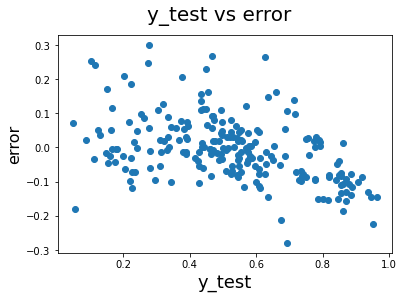

In [75]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_count-y_test)
fig.suptitle('y_test vs error', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('error', fontsize=16)                          # Y-label

In [76]:
index = [i for i in np.arange(0,len(X_test),1)]
plt.plot(index,y_test,color="blue")
plt.plot(index,y_test_count,color="green")
plt.title("Acutal vs Predicted")

Text(0.5, 1.0, 'Acutal vs Predicted')

### Calculate R2 Score and Mean Squared error

In [77]:
from sklearn.metrics import r2_score,mean_squared_error

In [78]:
print('R2 score',r2_score(y_true = y_test , y_pred=y_test_count))
print('Mean Squared error',mean_squared_error(y_true = y_test , y_pred=y_test_count))


R2 score 0.8125111111435237
Mean Squared error 0.008904936295436996


In [79]:
print('R2 score',r2_score(y_true = y_train , y_pred=y_train_count))
print('Mean Squared error',mean_squared_error(y_true = y_train , y_pred=y_train_count))

R2 score 0.8199246227062955
Mean Squared error 0.009065520884531164


## Conclusion.

- Factors affecting the demand
    - atemp - Based on the feeling of temperature, the demand raises upto 46%
    - YEAR_2019 - Year on Year the business improvement is around 23%
    - There is a constant baseline demand of around 20% from the average.
    - These three factors contribute to around 89% percent of demand and thus help in predicting the demand.
- Recommendations to business
    - Year on Year , the business is in the upward trend, so no problem with business growth post pandemic.
    - Downtime and busytime can be predicted based on the weather. Business can use the downtime for maintence, during busy time they can look for ways to expand the supply.